In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df=pd.read_csv("E:\AL-ML&DS\PRCTICAL EXAM\dataset\expense_data_1.csv")
print(df.head())


             Date               Account        Category  Subcategory  \
0  3/2/2022 10:11  CUB - online payment            Food          NaN   
1  3/2/2022 10:11  CUB - online payment           Other          NaN   
2  3/1/2022 19:50  CUB - online payment            Food          NaN   
3  3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4  3/1/2022 18:22  CUB - online payment            Food          NaN   

               Note    INR Income/Expense  Note.1  Amount Currency  Account.1  
0           Brownie   50.0        Expense     NaN    50.0      INR       50.0  
1  To lended people  300.0        Expense     NaN   300.0      INR      300.0  
2            Dinner   78.0        Expense     NaN    78.0      INR       78.0  
3             Metro   30.0        Expense     NaN    30.0      INR       30.0  
4            Snacks   67.0        Expense     NaN    67.0      INR       67.0  


In [110]:
df.drop(['Subcategory', 'Note.1','Currency','Account','Account.1'], axis=1, inplace=True, errors='ignore')

print(df.head())
print(df.columns)

             Date        Category              Note Income/Expense  Amount
0  3/2/2022 10:11            Food           Brownie        Expense    50.0
1  3/2/2022 10:11           Other  To lended people        Expense   300.0
2  3/1/2022 19:50            Food            Dinner        Expense    78.0
3  3/1/2022 18:56  Transportation             Metro        Expense    30.0
4  3/1/2022 18:22            Food            Snacks        Expense    67.0
Index(['Date', 'Category', 'Note', 'Income/Expense', 'Amount'], dtype='object')


In [87]:
data=df[["Date","Amount","Category","Note","Income/Expense"]]
print(data.head())


                 Date  Amount        Category              Note Income/Expense
0 2022-03-02 10:11:00    50.0            Food           Brownie        Expense
1 2022-03-02 10:11:00   300.0           Other  To lended people        Expense
2 2022-03-01 19:50:00    78.0            Food            Dinner        Expense
3 2022-03-01 18:56:00    30.0  Transportation             Metro        Expense
4 2022-03-01 18:22:00    67.0            Food            Snacks        Expense


In [85]:
print("Column names : \n\n",df.columns.tolist(),"\n")
print("Data Types : \n\n",df.dtypes,"\n")
print("Shape of dataset : ",df.shape)

Column names : 

 ['Date', 'Account', 'Category', 'Subcategory', 'Note', 'INR', 'Income/Expense', 'Note.1', 'Amount', 'Currency', 'Account.1'] 

Data Types : 

 Date               object
Account            object
Category           object
Subcategory       float64
Note               object
INR               float64
Income/Expense     object
Note.1            float64
Amount            float64
Currency           object
Account.1         float64
dtype: object 

Shape of dataset :  (277, 11)


In [86]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes


Date              datetime64[ns]
Account                   object
Category                  object
Subcategory              float64
Note                      object
INR                      float64
Income/Expense            object
Note.1                   float64
Amount                   float64
Currency                  object
Account.1                float64
dtype: object

In [81]:
def summarize_exp(by="Category"):
    summary=df.groupby('Income/Expense')['Amount'].sum()
    return summary.sort_values(ascending=True)
print("Summarize by income or expense\n")
print(summarize_exp())

Summarize by income or expense

Income/Expense
Expense    1030
Income     1690
Name: Amount, dtype: int64


In [103]:
def summarize_exp(by="Category"):
    summary=df.groupby('Category')['Amount'].sum()
    return summary.sort_values(ascending=True)
print("Summarize by category\n")
print(summarize_exp())

Summarize by category

Category
Petty cash              3.00
Gift                  115.00
Beauty                196.00
Self-development      400.00
Education            1400.00
Social Life          2513.72
Apparel              3388.00
Salary               8000.00
Transportation       9203.80
Household           12188.00
Allowance           14000.00
Food                23396.76
Other               37868.00
Name: Amount, dtype: float64


In [24]:
total=df.groupby('Category')['Amount'].sum()
avg=df.groupby('Category')['Amount'].mean()
print("Total amount category wise : \n\n",total,"\n")
print("Average is category wise: \n\n",avg)

Total amount : 

 Category
Allowance           14000.00
Apparel              3388.00
Beauty                196.00
Education            1400.00
Food                23396.76
Gift                  115.00
Household           12188.00
Other               37868.00
Petty cash              3.00
Salary               8000.00
Self-development      400.00
Social Life          2513.72
Transportation       9203.80
Name: Amount, dtype: float64 

Average is : 

 Category
Allowance           2333.333333
Apparel              484.000000
Beauty               196.000000
Education           1400.000000
Food                 149.979231
Gift                 115.000000
Household           2031.333333
Other                631.133333
Petty cash             3.000000
Salary              8000.000000
Self-development     400.000000
Social Life          502.744000
Transportation       296.896774
Name: Amount, dtype: float64


In [105]:
total=df.groupby('Income/Expense')['Amount'].sum()
avg=df.groupby('Income/Expense')['Amount'].mean()
print("Total amount Income or Expense wise : \n\n",total,"\n")
print("Average is Income or Expense wise : \n\n",avg,"\n")

Total amount Income or Expense wise : 

 Income/Expense
Expense    57918.28
Income     54754.00
Name: Amount, dtype: float64 

Average is Income or Expense wise : 

 Income/Expense
Expense     250.728485
Income     1190.304348
Name: Amount, dtype: float64 



In [27]:
print(df[['Note','Category']].head(10))

               Note        Category
0           Brownie            Food
1  To lended people           Other
2            Dinner            Food
3             Metro  Transportation
4            Snacks            Food
5        From vicky           Other
6          From dad           Other
7             Pizza            Food
8       From kumara           Other
9             Lunch            Food


In [32]:


df["Date"] = pd.to_datetime(df["Date"])
weekly_expense = df.groupby(df["Date"].dt.to_period("W"))["Amount"].sum()

print(" Weekly Total Expenses:\n")
print(weekly_expense)



 Weekly Total Expenses:

Date
2021-11-15/2021-11-21     3005.00
2021-11-22/2021-11-28     4135.40
2021-11-29/2021-12-05    17877.00
2021-12-06/2021-12-12     3136.00
2021-12-13/2021-12-19     3190.72
2021-12-20/2021-12-26     2376.00
2021-12-27/2022-01-02     3460.00
2022-01-03/2022-01-09    19512.11
2022-01-10/2022-01-16     7956.25
2022-01-17/2022-01-23     6197.15
2022-01-24/2022-01-30     4234.00
2022-01-31/2022-02-06     9078.00
2022-02-07/2022-02-13    15068.00
2022-02-14/2022-02-20     4164.00
2022-02-21/2022-02-27     7618.50
2022-02-28/2022-03-06     1664.15
Freq: W-SUN, Name: Amount, dtype: float64


In [35]:
df["Date"] = pd.to_datetime(df["Date"])
monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()

print(" Monthly Total Expenses:\n")
print(monthly_expense)



 Monthly Total Expenses:

Date
2021-11     7623.40
2021-12    27538.72
2022-01    40320.51
2022-02    36064.65
2022-03     1125.00
Freq: M, Name: Amount, dtype: float64


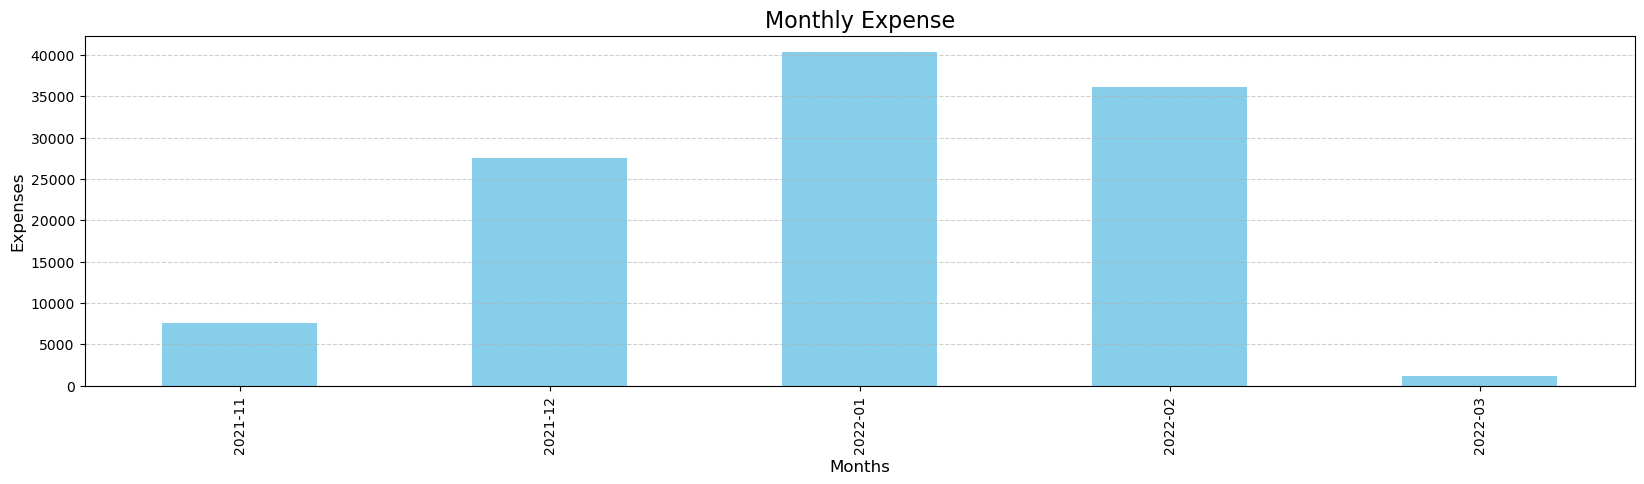

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# ---- Weekly Sales Bar Chart ----
plt.subplot(2, 1, 1)  # (rows, columns, position)
monthly_expense.plot(kind='bar', color='skyblue')
plt.title("Monthly Expense", fontsize=16)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Expenses", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)




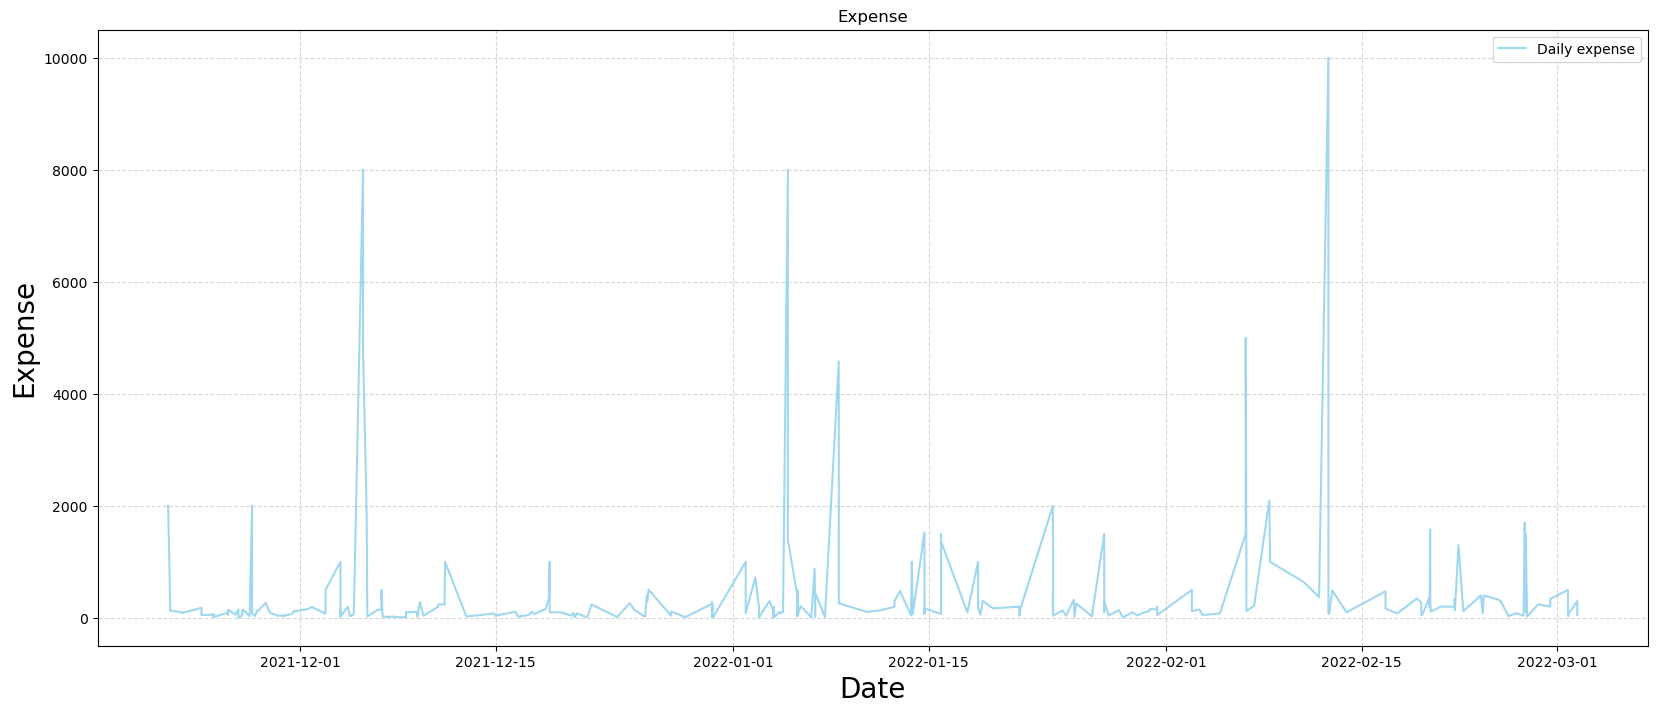

In [53]:
plt.figure(figsize=(20,8))
plt.plot(df['Date'], df['Amount'], color='skyblue', label='Daily expense', alpha=0.8)
plt.title("Expense")
plt.xlabel("Date",fontsize=20)
plt.ylabel("Expense",fontsize=20)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


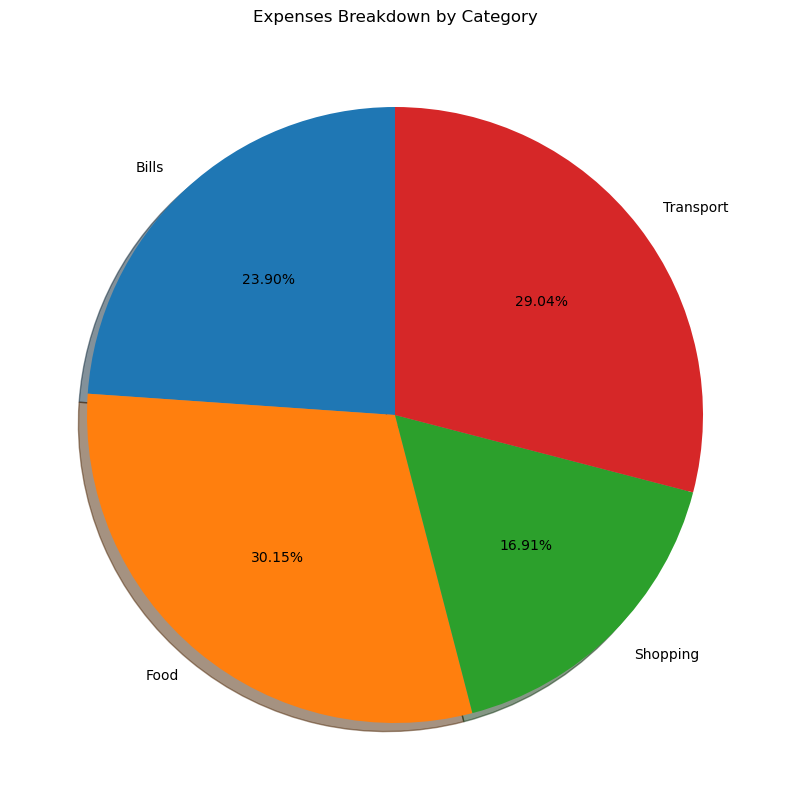

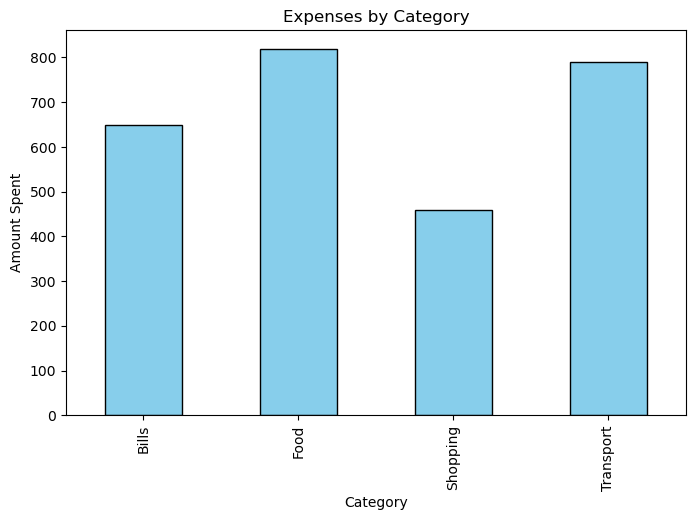

In [63]:

expense_summary = df[df['Category'] != 'Income'].groupby("Category")["Amount"].sum()

# Pie Chart
plt.figure(figsize=(10,10))
expense_summary.plot.pie(autopct='%2.2f%%', startangle=90, shadow=True)
plt.title("Expenses Breakdown by Category")
plt.ylabel("")
plt.show()

plt.figure(figsize=(8,5))
expense_summary.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Expenses by Category")
plt.xlabel("Category")
plt.ylabel("Amount Spent")
plt.show()


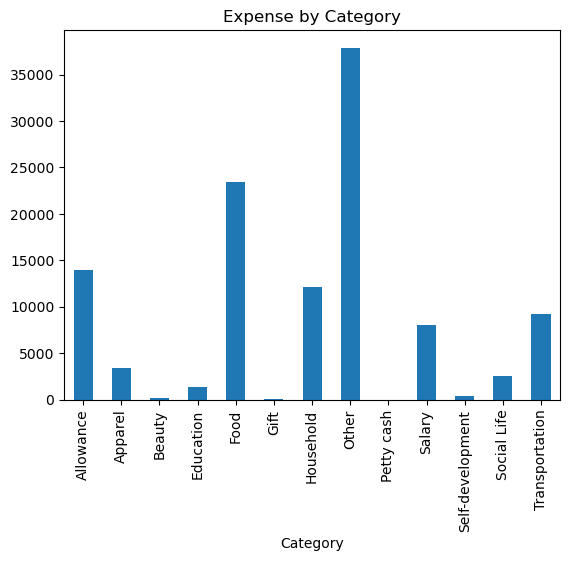

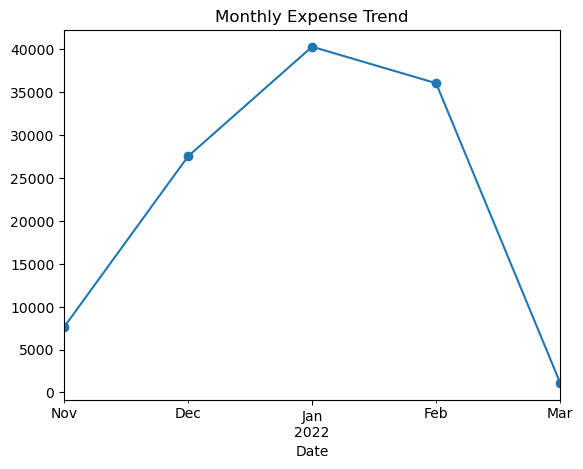

In [56]:
df.groupby('Category')['Amount'].sum().plot(kind='bar')
plt.title("Expense by Category")
plt.show()

df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().plot(kind='line', marker='o')
plt.title("Monthly Expense Trend")
plt.show()




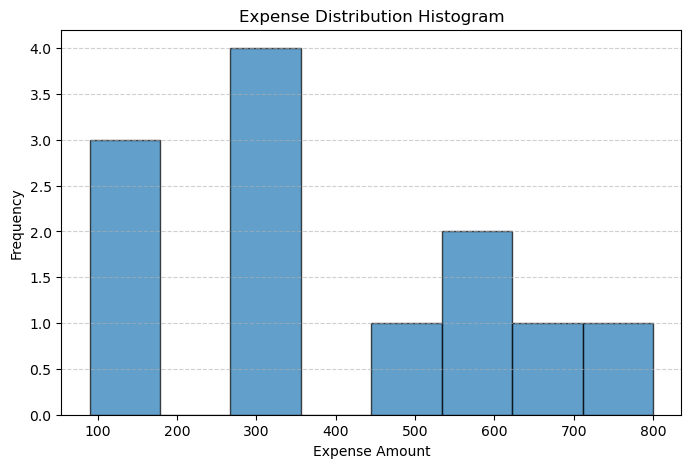

In [58]:

data = {
    'Amount': [120, 340, 560, 150, 700, 90, 310, 450, 600, 270, 330, 800]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8,5))
plt.hist(df['Amount'], bins=8, edgecolor='black', alpha=0.7)

plt.title("Expense Distribution Histogram")
plt.xlabel("Expense Amount")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


C:\Users\rkc11\AppData\Local\Temp\ipykernel_29760\46471663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income/Expense', y='Amount',data=df, palette='pastel')


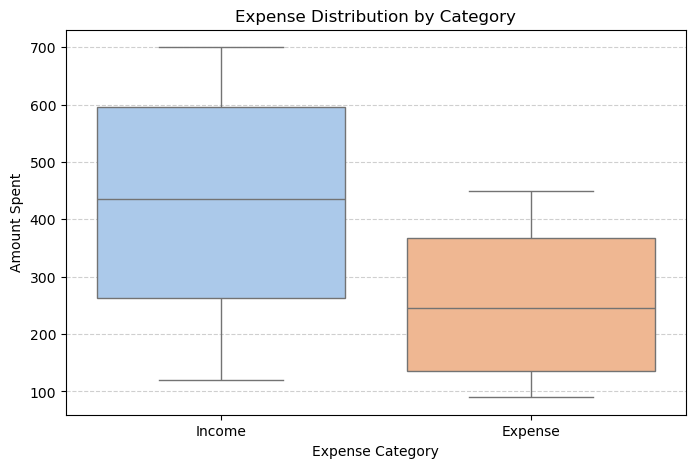

In [115]:
data = {
    'Income/Expense' : ['Income','Expense','Income','Expense','Income','Expense','Income','Expense'],
    'Amount': [120, 340, 560, 150, 700, 90, 310, 450]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8,5))
sns.boxplot(x='Income/Expense', y='Amount',data=df, palette='pastel')

plt.title("Expense Distribution by Category")
plt.xlabel("Expense Category")
plt.ylabel("Amount Spent")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [113]:
data = pd.DataFrame(columns=["Date", "Category", "Note", "Amount", "Income/Expense"])

def add_expense(date, category, note, amount, exp_type="Expense"):
    global data
    new_entry = pd.DataFrame([{
        "Date": date,
        "Category": category,
        "Note": note,
        "Amount": amount,
        "Income/Expense": exp_type
    }])
    data = pd.concat([data, new_entry], ignore_index=True)
    print(f" Added: {note} - ₹{amount} ({category})")

add_expense("2025-08-22 19:30", "Food", "Snacks", 2500, "Expense")
add_expense("2025-08-23 08:00", "Subscriptions", "Netflix Monthly Plan", 4500, "Expense")
add_expense("2025-08-24 14:00", "Entertainment", "Outdoor Games with friends", 7000, "Expense")

print("\nCurrent Expense Data:")
print(data)


 Added: Snacks - ₹2500 (Food)
 Added: Netflix Monthly Plan - ₹4500 (Subscriptions)
 Added: Outdoor Games with friends - ₹7000 (Entertainment)

Current Expense Data:
               Date       Category                        Note Amount  \
0  2025-08-22 19:30           Food                      Snacks   2500   
1  2025-08-23 08:00  Subscriptions        Netflix Monthly Plan   4500   
2  2025-08-24 14:00  Entertainment  Outdoor Games with friends   7000   

  Income/Expense  
0        Expense  
1        Expense  
2        Expense  
